In [1]:
import matplotlib.pyplot as plt
import os, sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import numpy as np
import collections

In [3]:
plt.rcParams['font.size'] = 14.4

In [4]:
# from data_handler.dis_train_norm_dataloader import get_mesa_dis_dict
from sleep_stage_config import Config

In [5]:
cfg = Config()

In [6]:
import itertools
import plotly.express as px

In [7]:
def my_fmt(x):
    assert np.sum(x) > 0, print("All values are zero")
    print(x)   
    return '{:.0f}%\n({:.0f})'.format(x, np.round(total*x/100))


# values = pd.Series([False, False, True, True, True, True])
# v_counts = values.value_counts()
# total = len(values)
# fig = plt.figure()
# plt.pie(v_counts, labels=v_counts.index, autopct=my_fmt, shadow=True);


In [8]:
id_df = pd.read_csv(cfg.TRAIN_TEST_SPLIT)

In [9]:
valid_id = id_df.uids.values.tolist()

In [10]:
a4_size = (11.69/2,8.27/2)

In [13]:
df = pd.read_csv(fr"./mesa_admin_df.csv")
df = df[df.mesaid.isin(valid_id)]

In [14]:
df.head()

,mesaid,sleepage5c,age_group,bmi5c,bmicat5c,ahi4pa5,ahi_group,gender1,file_name
0,1,70,2,22.010834,0,23.023256,2,0,0001_combined.csv
1,2,83,3,21.897972,0,7.379679,1,0,0002_combined.csv
2,6,57,0,56.007175,3,58.324022,3,0,0006_combined.csv
3,14,60,1,31.448358,2,9.241706,1,0,0014_combined.csv
4,16,57,0,23.651947,0,3.696682,0,0,0016_combined.csv


In [15]:
group_age = df[['age_group', 'mesaid']].groupby('age_group').count().reset_index().values

In [16]:
group_age_df = df[['age_group', 'mesaid']].groupby('age_group').count().reset_index().rename(columns={"mesaid": "counts"})

In [17]:
age_dict = {}
for g in df.age_group.unique():
    age_dict[g] = [df[df['age_group'] == g]['sleepage5c'].min(), df[df['age_group'] == g]['sleepage5c'].max()]

In [18]:
group_age_df['age_group'] = group_age_df['age_group'].map(age_dict)

In [19]:
group_age_df

,age_group,counts
0,"[54, 59]",291
1,"[60, 69]",663
2,"[70, 79]",521
3,"[80, 89]",253
4,"[90, 94]",15


In [20]:
age_dict = collections.OrderedDict(sorted(age_dict.items()))

In [21]:
age_list = []
for _, x in (age_dict.items()):
    age_list.append(x)

In [22]:
age_list 

[[54, 59], [60, 69], [70, 79], [80, 89], [90, 94]]

In [23]:
age_list[0][0] = 50
age_list[-1][-1] = 99
age_list

[[50, 59], [60, 69], [70, 79], [80, 89], [90, 99]]

In [31]:
group_age

array([[  0, 291],
       [  1, 663],
       [  2, 521],
       [  3, 253],
       [  4,  15]], dtype=int64)

In [25]:
np.sum(group_age[:,1])

1743

In [28]:
def plot_pie(x, label_ls, fig_size, path_to_file):
    fig = plt.figure(figsize=fig_size)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    ax.pie(x, labels = label_ls,autopct=my_fmt) # '%1.2f%%'
    
    plt.savefig(path_to_file, bbox_inches='tight', dpi=300)
    plt.show()

In [29]:
total = 1743

In [30]:
age_list

[[50, 59], [60, 69], [70, 79], [80, 89], [90, 99]]

### Plot the Age Pie ##

In [26]:
age_plt_file = fr"L:\GoogleDrive\$Collaborators\Huy\JBHI\major revision\age_group.png"

In [108]:
group_age[:, 1]

array([291, 663, 521, 253,  15], dtype=int64)

In [32]:
age_list

[[50, 59], [60, 69], [70, 79], [80, 89], [90, 99]]

In [100]:
group_age[1,1]
group_age_per = 100*np.round(group_age[:,1]/np.sum(group_age[:,1]),2)

In [101]:
group_age_per

array([17., 38., 30., 15.,  1.])

In [74]:
group_age_per[:1]

array([0.16695353])

In [246]:
def plot_stacked_bar(percentages, counts, categories, color_set, x_label, path_to_file):
    
    # Initialize figure and ax
    fig, ax = plt.subplots(figsize=(4,5))
    fig.patch.set_facecolor('white') # set background to white
    
    # Create stacked bars
    bottom = 0
    for i, (percentage, count) in enumerate(zip(percentages, counts)):
        bar = plt.bar(x_label, percentage, bottom=bottom, color=color_set[i])
        bottom += percentage  # !!!!! this is important, to make sure the stack high position is accumulated.
    
        # Add label in the middle of each bar
        label = f"{percentage}%({count}), {categories[i]}"
        plt.text(x_label, bottom - percentage / 2, label, ha='center', va='center',fontsize=16)
    
    # Remove borders
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(axis='x', labelsize=16)  # Set x-tick label size
    ax.tick_params(axis='y', labelsize=16)  # Set y-tick label size
    # Set x-axis label and keep y-ticks
    # plt.xlabel('Age')
    # plt.xticks()  # Optional: Rotate x-ticks for better readability
    plt.savefig(path_to_file, bbox_inches='tight', dpi=300)
    plt.show()

In [247]:
percentages = [17., 38., 30., 15., 1.]
age_ranges = [[50, 59], [60, 69], [70, 79], [80, 89], [90, 99]]
counts = [291, 663, 521, 253, 15]
categories = ['[54s-59s]', '[60s-69s]', '[70s-79s]', '[80s-89s]', '[90s-99s]']
color_set = ["#f8A12E", "#d4667f","#6D9EEB", "#A1C591", "#FDBE6B"]

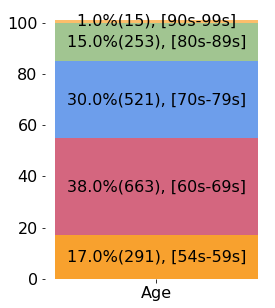

In [248]:
plot_stacked_bar(percentages,  counts, categories, color_set, x_label= "Age", path_to_file= age_plt_file)

In [213]:
# plot_pie(group_age[:,1], age_list, a4_size, age_plt_file)

## Let us do the BMI

In [214]:
bmi_plt_file = fr"L:\GoogleDrive\$Collaborators\Huy\JBHI\major revision\bmi_group.png"

In [215]:
bmi_dict ={0: "[0, 25)", 1: "[25, 30)", 2: "[30, 40)", 3: "$\geq$ 40"}

In [216]:
group_bmi_df = df[['bmicat5c', 'mesaid']].groupby('bmicat5c').count().reset_index().rename(columns={"mesaid": "counts"})
group_bmi_df['bmicat5c'] = group_bmi_df['bmicat5c'].map(bmi_dict)

In [217]:
group_bmi_df

,bmicat5c,counts
0,"[0, 25)",457
1,"[25, 30)",668
2,"[30, 40)",553
3,$\geq$ 40,65


In [218]:
group_bmi_df["Percentage"] = np.round(group_bmi_df["counts"]/ group_bmi_df["counts"].sum()*100)

In [219]:
# group_bmi_df = pd.concat([pd.DataFrame({"bmicat5c": [0], "counts": [0] }), group_bmi_df]).reset_index(drop=True)

In [220]:
group_bmi_df

,bmicat5c,counts,Percentage
0,"[0, 25)",457,26.0
1,"[25, 30)",668,38.0
2,"[30, 40)",553,32.0
3,$\geq$ 40,65,4.0


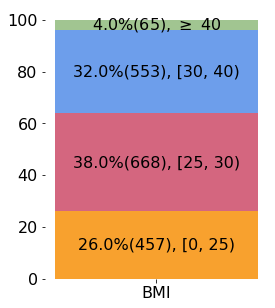

In [249]:
plot_stacked_bar(group_bmi_df["Percentage"], group_bmi_df["counts"], group_bmi_df["bmicat5c"], color_set,x_label="BMI", path_to_file= bmi_plt_file)

26.219162344932556
38.32472860813141
31.726908683776855
3.7292025983333588


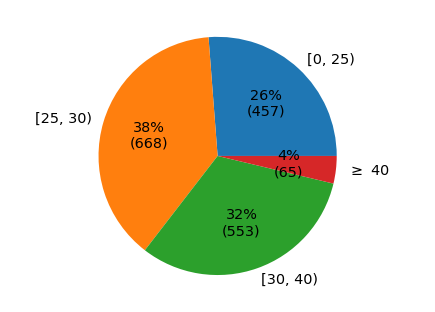

In [51]:
# plot_pie(group_bmi_df.counts.values, group_bmi_df.bmicat5c.values, a4_size, bmi_plt_file)

In [52]:
df

,mesaid,sleepage5c,age_group,bmi5c,bmicat5c,ahi4pa5,ahi_group
0,1,70,2,22.010834,0,23.023256,2
1,2,83,3,21.897972,0,7.379679,1
2,6,57,0,56.007175,3,58.324022,3
5,14,60,1,31.448358,2,9.241706,1
6,16,57,0,23.651947,0,3.696682,0
...,...,...,...,...,...,...,...
2231,6802,65,1,43.312157,3,11.684902,1
2232,6804,77,2,24.323518,0,28.368201,2
2233,6807,60,1,28.322188,1,46.582915,3
2235,6811,79,2,27.725492,1,43.532609,3


## Plot AHI

In [222]:
df[df['ahi_group']==0].describe()

,mesaid,sleepage5c,age_group,bmi5c,bmicat5c,ahi4pa5,ahi_group,gender1
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.0,295.000000
mean,3436.349153,66.745763,1.213559,26.517278,0.816949,2.788726,0.0,0.271186
std,1977.382174,8.601521,0.935952,5.449821,0.884706,1.373853,0.0,0.445328
min,16.000000,55.000000,0.000000,17.078289,0.000000,0.000000,0.0,0.000000
25%,1724.500000,60.000000,1.000000,22.400420,0.000000,1.714286,0.0,0.000000
50%,3520.000000,64.000000,1.000000,25.233118,1.000000,2.870813,0.0,0.000000
75%,5123.000000,74.000000,2.000000,30.150876,2.000000,3.923401,0.0,1.000000
max,6773.000000,90.000000,4.000000,48.985663,3.000000,4.969697,0.0,1.000000


In [224]:
ahi_plt_file = fr"L:\GoogleDrive\$Collaborators\Huy\JBHI\major revision\ahi_group.png"

In [225]:
ahi_dict ={0: "[0, 5)", 1: "[5, 15)", 2: "[15, 30)", 3: "$\geq$ 30"}

In [226]:
group_ahi_df = df[['ahi_group', 'mesaid']].groupby('ahi_group').count().reset_index().rename(columns={"mesaid": "counts"})
group_ahi_df['ahi_group'] = group_ahi_df['ahi_group'].map(ahi_dict)

In [228]:
group_ahi_df

,ahi_group,counts
0,"[0, 5)",295
1,"[5, 15)",612
2,"[15, 30)",488
3,$\geq$ 30,348


In [229]:
group_ahi_df["Percentage"] = np.round(group_ahi_df["counts"]/ group_ahi_df["counts"].sum()*100)

In [230]:
group_ahi_df

,ahi_group,counts,Percentage
0,"[0, 5)",295,17.0
1,"[5, 15)",612,35.0
2,"[15, 30)",488,28.0
3,$\geq$ 30,348,20.0


In [227]:
cmap = plt.get_cmap("Pastel1")
cmap_colors = cmap(np.array([1, 2, 3, 4]))

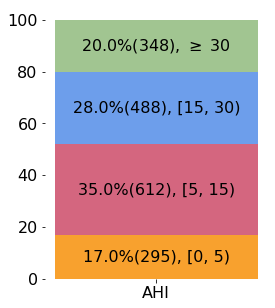

In [250]:
plot_stacked_bar(group_ahi_df["Percentage"], group_ahi_df["counts"], group_ahi_df["ahi_group"], color_set,x_label="AHI", path_to_file= ahi_plt_file)

16.924841701984406
35.11187732219696
26.85025930404663
21.113023161888123


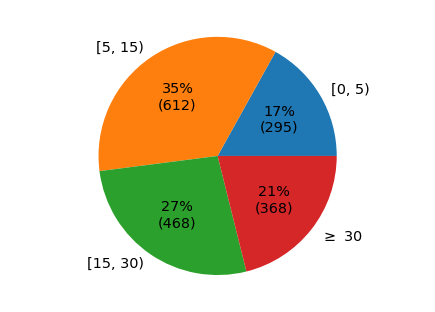

In [59]:
# plot_pie(group_ahi_df.counts.values, group_ahi_df.ahi_group.values, a4_size,ahi_plt_file)

In [106]:
group_ahi_df

NameError: name 'group_ahi_df' is not defined